In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

a:\Applications\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


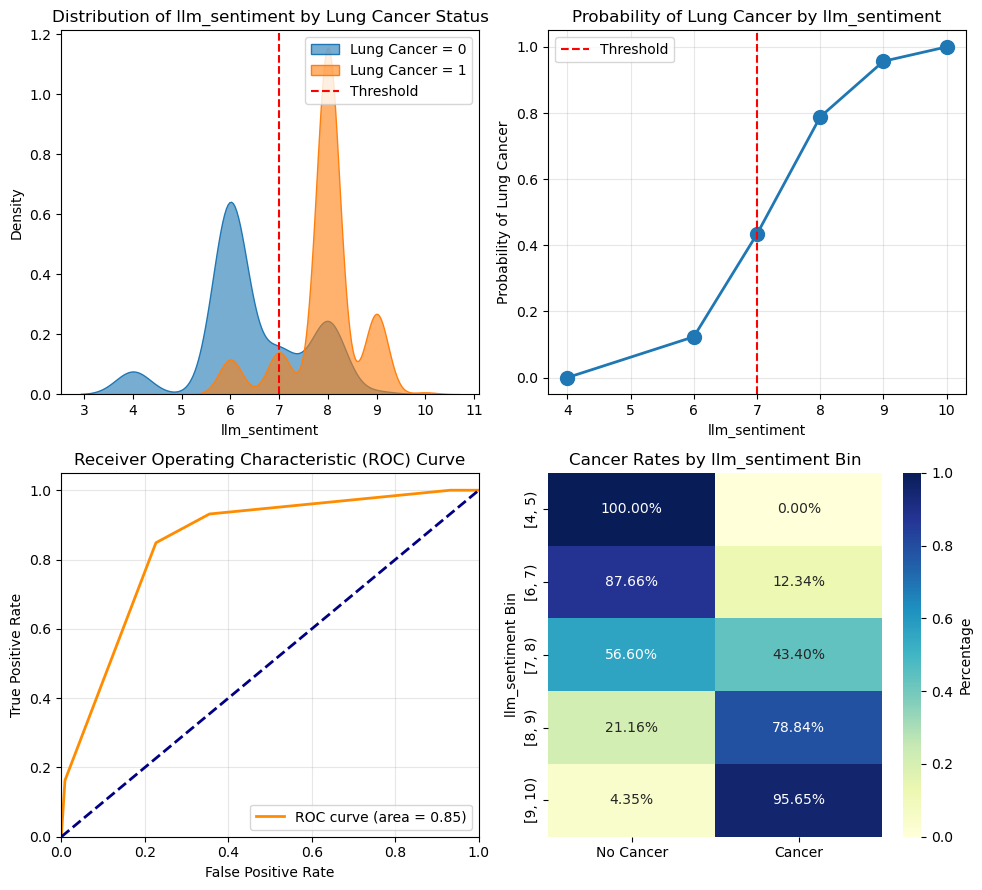

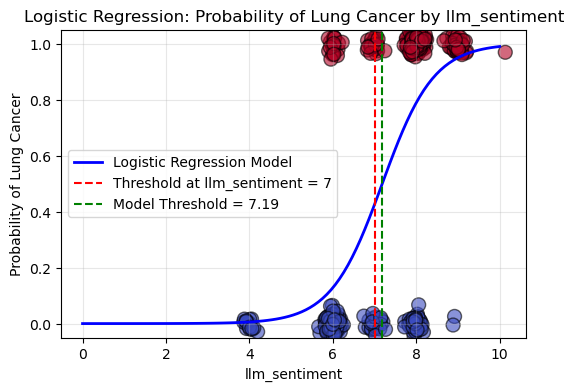

Analysis results:
Current threshold: 7.0
Optimal threshold from ROC curve: 8.00
Logistic regression threshold: 7.19
   llm_sentiment  cancer_probability  count
0            4.0            0.000000     16
1            6.0            0.123377    154
2            7.0            0.433962     53
3            8.0            0.788382    241
4            9.0            0.956522     46
5           10.0            1.000000      1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For a real implementation, you would load the CSV file:
df = pd.read_csv("train_test_data.csv")
df = df[["Subject", "lung_cancer", "llm_sentiment"]]

# Create a figure with multiple plots
plt.figure(figsize=(16//1.5, 14//1.5))

# 1. Histogram with KDE overlay showing distribution by cancer status
plt.subplot(2, 2, 1)
for cancer_status in [0, 1]:
    subset = df[df['lung_cancer'] == cancer_status]
    sns.kdeplot(subset['llm_sentiment'], fill=True, 
                common_norm=False, 
                alpha=0.6, 
                label=f'Lung Cancer = {cancer_status}')
    
plt.axvline(x=7, color='red', linestyle='--', label='Threshold')
plt.title('Distribution of llm_sentiment by Lung Cancer Status')
plt.xlabel('llm_sentiment')
plt.ylabel('Density')
plt.legend()

# 2. Probability Plot - showing probability of cancer at each sentiment level
plt.subplot(2, 2, 2)
# Group by llm_sentiment and calculate the proportion of lung_cancer=1
sentiment_groups = df.groupby('llm_sentiment')['lung_cancer'].mean().reset_index()
sentiment_groups.columns = ['llm_sentiment', 'cancer_probability']

# Plot the probability curve
plt.plot(sentiment_groups['llm_sentiment'], sentiment_groups['cancer_probability'], 
         'o-', linewidth=2, markersize=10)
plt.axvline(x=7, color='red', linestyle='--', label='Threshold')
plt.title('Probability of Lung Cancer by llm_sentiment')
plt.xlabel('llm_sentiment')
plt.ylabel('Probability of Lung Cancer')
plt.grid(True, alpha=0.3)
plt.ylim(-0.05, 1.05)
plt.legend()

# 3. ROC Curve - to evaluate threshold performance
plt.subplot(2, 2, 3)
# Get the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(df['lung_cancer'], df['llm_sentiment'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 4. Heatmap of correlation between all sentiment levels and cancer outcomes
plt.subplot(2, 2, 4)
# Create a cross-tabulation of sentiment levels and cancer outcomes
# Bin the sentiment values to create a meaningful heatmap
df['sentiment_bin'] = pd.cut(df['llm_sentiment'], bins=np.arange(0, 11, 1), 
                             include_lowest=True, right=False)
crosstab = pd.crosstab(df['sentiment_bin'], df['lung_cancer'])
crosstab.columns = ['No Cancer', 'Cancer']

# Convert to percentages for better interpretation
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the heatmap
sns.heatmap(crosstab_pct, annot=True, cmap='YlGnBu', fmt='.2%', cbar_kws={'label': 'Percentage'})
plt.title('Cancer Rates by llm_sentiment Bin')
plt.ylabel('llm_sentiment Bin')
plt.tight_layout()

# 5. Create an extra figure with Logistic Regression visualization
plt.figure(figsize=(10//1.5, 6//1.5))

# Fit a logistic regression model
model = LogisticRegression()
model.fit(df[['llm_sentiment']], df['lung_cancer'])

# Create a range of sentiment values for prediction
sentiment_range = np.linspace(0, 10, 100).reshape(-1, 1)
predicted_probs = model.predict_proba(sentiment_range)[:, 1]

# Plot the logistic curve
plt.plot(sentiment_range, predicted_probs, 'b-', linewidth=2, 
         label='Logistic Regression Model')

# Scatter plot of actual data points (with jitter for visualization)
x_jitter = df['llm_sentiment'] + np.random.normal(0, 0.1, size=len(df))
y_jitter = df['lung_cancer'] + np.random.normal(0, 0.02, size=len(df))
plt.scatter(x_jitter, y_jitter, c=df['lung_cancer'], cmap='coolwarm', 
            alpha=0.6, s=100, edgecolors='k')

# Add the threshold line
plt.axvline(x=7, color='red', linestyle='--', label='Threshold at llm_sentiment = 7')

# Calculate and show the inflection point of the logistic curve
# The point where probability crosses 0.5 is the model's natural threshold
inflection_point = -model.intercept_[0] / model.coef_[0][0]
plt.axvline(x=inflection_point, color='green', linestyle='--', 
            label=f'Model Threshold = {inflection_point:.2f}')

plt.title('Logistic Regression: Probability of Lung Cancer by llm_sentiment')
plt.xlabel('llm_sentiment')
plt.ylabel('Probability of Lung Cancer')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.05, 1.05)

# plt.tight_layout()
plt.show()

# X = df['llm_sentiment']
# y = df['lung_cancer']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# log_model = LogisticRegression()

# log_model.fit(X_train, y_train)

# y_pred = log_model.predict(X_test)
# accuracy_ = accuracy_score(y_test, y_pred)
# print(f'Accuracy Score {accuracy_}')

def analyze_full_dataset(filepath):
    """
    Perform a comprehensive analysis on the full dataset.
    
    Args:
        filepath: Path to the CSV file
        
    Returns:
        DataFrame with analysis results
    """
    # Load the data
    full_df = pd.read_csv(filepath)
    full_df = full_df[["Subject", "lung_cancer", "llm_sentiment"]]
    
    # Create predictions based on the threshold rule
    full_df['predicted_cancer'] = (full_df['llm_sentiment'] >= 7).astype(int)
    
    # Find the optimal threshold using ROC curve
    fpr, tpr, thresholds = roc_curve(full_df['lung_cancer'], full_df['llm_sentiment'])
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    
    # Create a logistic regression model
    model = LogisticRegression()
    model.fit(full_df[['llm_sentiment']], full_df['lung_cancer'])
    model_threshold = -model.intercept_[0] / model.coef_[0][0]
    
    print(f"Analysis results:")
    print(f"Current threshold: 7.0")
    print(f"Optimal threshold from ROC curve: {optimal_threshold:.2f}")
    print(f"Logistic regression threshold: {model_threshold:.2f}")
    
    # For each sentiment level, calculate cancer probability
    sentiment_probs = full_df.groupby('llm_sentiment')['lung_cancer'].agg(['mean', 'count']).reset_index()
    sentiment_probs.columns = ['llm_sentiment', 'cancer_probability', 'count']
    
    return sentiment_probs

# Uncomment to run the full analysis
sentiment_probability_table = analyze_full_dataset("train_test_data.csv")
print(sentiment_probability_table)

In [15]:
df.head()

,n1,n2,n3,n4,n5,n6,n7,n8,Subject,elig,...,proclc,can_scr,canc_free_days,lung_cancer,procedures,linked_to_positive_screen,treament_categories,treatment_types,treatment_days,llm_sentiment
0,-0.5659,-5.7781,-1.7663,1.6876,-4.0357,4.7126,-0.8175,-2.6372,100158,2,...,1,1,728,1,"{'Lymphadenectomy/lymph node sampling', 'Pulmo...",1.0,{'Surgical'},"{'Lobectomy', 'Lymphadenectomy/Lymph Node Samp...",795.0,8.0
1,-1.1408,-10.8415,-3.4410,3.1966,-8.0603,9.2976,-1.7084,-5.1535,100280,2,...,1,1,357,1,"{'Lymphadenectomy/lymph node sampling', 'Pulmo...",1.0,{'Surgical'},"{'Lobectomy', 'Wedge Resection', 'Lymphadenect...",456.0,8.0
2,-0.1705,-3.1065,-0.7453,0.8132,-1.7997,2.3411,-0.4637,-1.1637,100518,2,...,1,1,0,1,"{'Radionuclide scan - Bone', 'MRI - Brain', 'T...",1.0,"{'Radiation', 'Systemic Chemotherapy'}","{'Radiation of Hilar/Mediastinal Lymph Nodes',...",82.0,10.0
3,-1.0549,-9.9045,-3.0729,3.0371,-7.3714,8.3179,-1.4914,-4.6561,100570,2,...,1,1,0,1,"{'Cytology - Bronchoscopic', 'Biopsy - Other',...",1.0,{'Surgical'},"{'Lobectomy', 'Lymphadenectomy/Lymph Node Samp...",69.0,8.0
4,0.0496,-2.4577,-0.4913,0.6106,-1.1443,1.8657,-0.4773,-0.6870,101068,2,...,1,1,321,1,"{'Cytology - Bronchoscopic', 'Lymphadenectomy/...",1.0,"{'Systemic Chemotherapy', 'Surgical'}","{'Wedge Resection', 'Pneumonectomy', 'Systemic...",621.0,8.0


In [16]:
df['llm_sentiment'].head()

0     8.0
1     8.0
2    10.0
3     8.0
4     8.0
Name: llm_sentiment, dtype: float64

In [18]:
df = pd.read_csv(r'A:\Software Projects\Segmentation\train_test_data.csv')

X = df[['llm_sentiment']]
y = df[['lung_cancer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
accuracy_ = accuracy_score(y_test, y_pred)
print(f'Accuracy Score {accuracy_}')

Accuracy Score 0.8446601941747572


a:\Applications\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
